In [5]:
import pandas as pd
import numpy as np

drug200 = pd.read_csv("drug200.csv")
drug200


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### This dataset is centered around the idea of patients and what type of issues they have that can be used to determine the type of drug they need. I will use Linear Regression to predict that older patients will have higher sodium to potassium ration in blood(Na_to_K).

In [2]:
# Here, I am using the first 50 rows of my Drug dataset
drug200.head(50)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


### Essentially, what I want to predict is that patients who are older are more likely to have higher sodium to potassium ration in blood compared to younger patients. I will be using the following columns.
#### 1. Age 

#### 2. Na_to_K

##### Essentially, Older patients (what we are trying to predict) have higher higher sodium to potassium ration in blood compared to younger patients.

##### Clean the data if needed using pandas
##### For my dataset, I did not need to clean it since the two columns that I am using have no invalid data values.

# Regression
## For my dataset, I am going to choose patient age to predict that the older they are, the higher sodium to potassium ration in their blood.

### By looking at my dataset, I predict that older patients have higher sodium to potassium ration in blood. My reasoning behind this comes from the fact elder people tend to have ### greater changces of having a heart attack or stroke, needing bypass surgery or angioplasty, or dying of cardiovascular disease due the reason of having high sodium to potassiu ### ration in their blood.

#### The dataset has 200 rows which is a sufficent amount of data. Now, to spilt the data so that the data we obtain is far more accurate and better cleaned up for the graph, I ### will be using 90% (basically 180 rows) for training and 10% (20 rows) for testing.

In [6]:
# Use sklearn to split our dataset
from sklearn.model_selection import train_test_split
from sklearn import svm

# Getting the age column as a subset of the data to use for features
x = drug200[["Age"]]

# Getting the Na_to_k as a subset of the data to use for prediction
y = drug200["Na_to_K"]

# Using sklearn to split the data between a training set and testing set
# 180 rows for training and 20 rows for testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=20, train_size=180, shuffle=True)
# We have x_train, y_train and have x_test, y_test


In [7]:
# import (like shown in the examples from the links)
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

Coefficients: 
 [-0.02756067]
The mean squared error is the following: 63.1921944972738
Coeff. of Determination: -0.06682994861278302
Now, we have the score which is from retrieved from cross-validation: -0.06682994861278302


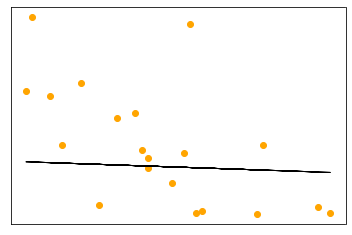

In [8]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

prediction = reg.predict(x_test)

print("Coefficients: \n", reg.coef_)

# Mean squared error
print("The mean squared error is the following:",
      mean_squared_error(y_test, prediction))

# A value of 1.0 indicates a perfect fit
print("Coeff. of Determination:", r2_score(y_test, prediction))

# The socre outcome printed:
print("Now, we have the score which is from retrieved from cross-validation:",
      reg.score(x_test, y_test))

# I used the colors: orange and black
plt.scatter(x_test, y_test,  color='orange')
plt.plot(x_test, prediction, color='black', linewidth=1)


plt.xticks(())
plt.yticks(())

plt.show()


### Explanation of what we are seeing from this graph:

#### By looking at my regression that I have just gotten, I can see that my prediction isn't correct. I was predicting that the older you are, rising blood ration would be higher. Based on this graph, my assumption is not correct.

#### Looking into details, the mean squared error of the test set is 45.712630529898384 and a score of -0.030984660059433233. From this you can see that my prediction is not entirely correct. This can be due to the fact of genetics, the environment people grow in, also it depends on the income of people because it is proven that rich people eat healthier where as poor people have unhealthy food.

